In [1]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

ERROR: Invalid requirement: '#'


Setup complete. Using torch 1.13.0+cpu CPU


In [2]:
%cd /content/yolov5
from roboflow import Roboflow
rf = Roboflow(api_key="wdlcDC48ur8j0TyW2DCA")
project = rf.workspace("fire-extinguisher").project("fireextinguisher-z5atr")
dataset = project.version(2).download("yolov5")

[WinError 3] The system cannot find the path specified: '/content/yolov5'
c:\Users\Johannes.Hammacher\OneDrive - Collaboration Betters The World\Desktop\FireExtinguisher_ObjectDetection\yolov5
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to FireExtinguisher-2 in yolov5pytorch:: 100%|██████████| 6533/6533 [00:14<00:00, 448.24it/s]


Define Model Configuration and Architecture
We will write a yaml script that defines the parameters for our model like the number of classes, anchors, and each layer.

You do not need to edit these cells, but you may.

Train Custom YOLOv5 Detector
Next, we'll fire off training!
Here, we are able to pass a number of arguments:

img: define input image size
batch: determine batch size
epochs: define the number of training epochs. (Note: often, 3000+ are common here!)
data: set the path to our yaml file
cfg: specify our model configuration
weights: specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive folder)
name: result names
nosave: only save the final checkpoint
cache: cache images for faster training

In [9]:
# train yolov5s on custom data for 100 epochs
# time its performance
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 1 --data ./FireExtinguisher-2/data.yaml --cfg ./models/yolov5s.yaml --weights '' --name yolov5s_results  --cache

[WinError 3] The system cannot find the path specified: '/content/yolov5/'
c:\Users\Johannes.Hammacher\OneDrive - Collaboration Betters The World\Desktop\FireExtinguisher_ObjectDetection\yolov5
^C


Inference

With pre-trained weights (100 epochs) from run on google colab GPU excelerated hardware

In [13]:
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source ./FireExtinguisher-2/valid/images

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=./FireExtinguisher-2/valid/images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
unknown option: -
usage: git [-v | --version] [-h | --help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | -P | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           [--super-prefix=<path>] [--config-env=<name>=<envvar>]
           <command> [<args>]
YOLOv5  2023-1-23 Python-3.10.4 torch-1.13.0+cpu CPU

Fusing layers... 
custom_YOLOv5s

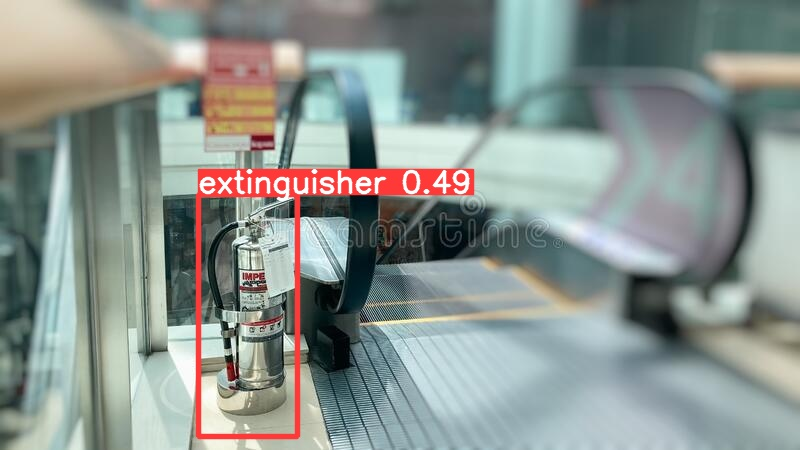

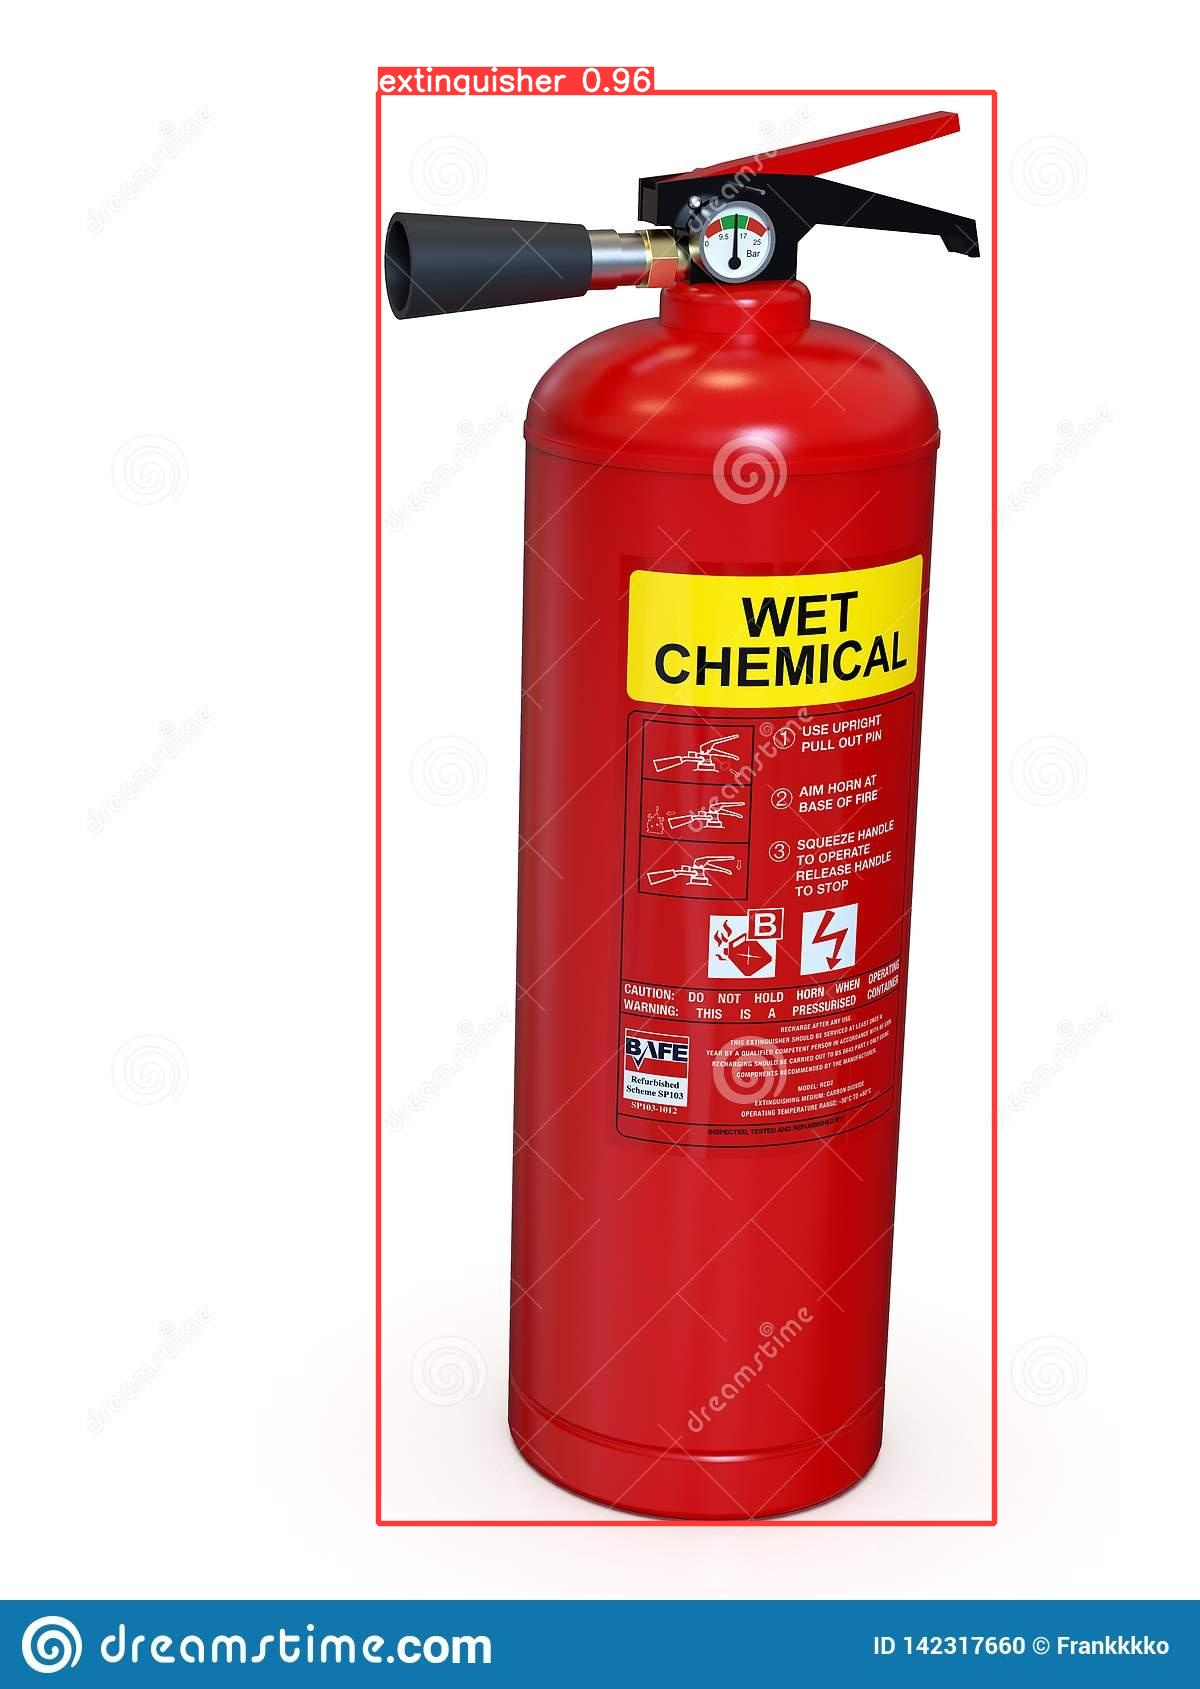

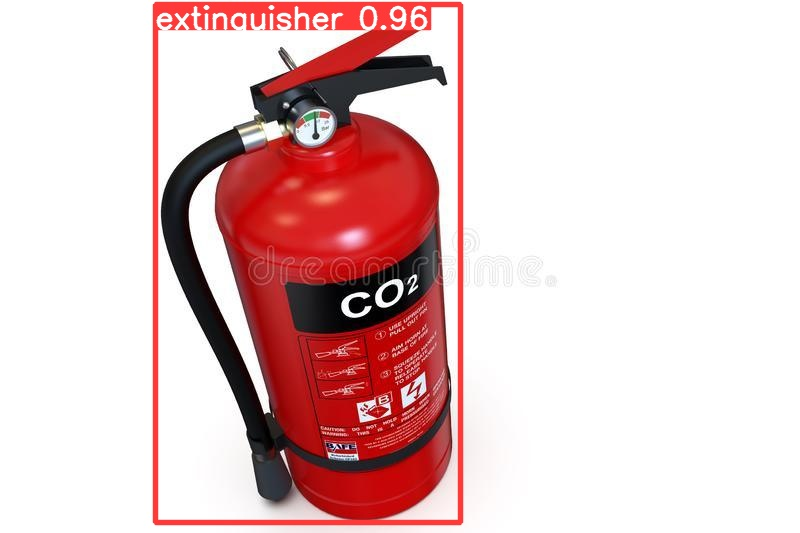

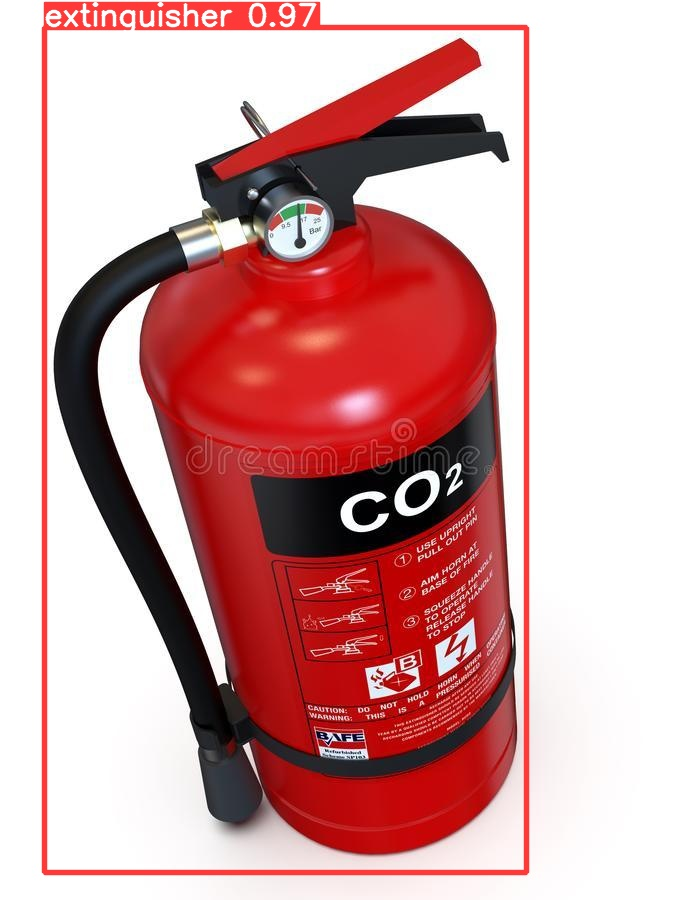

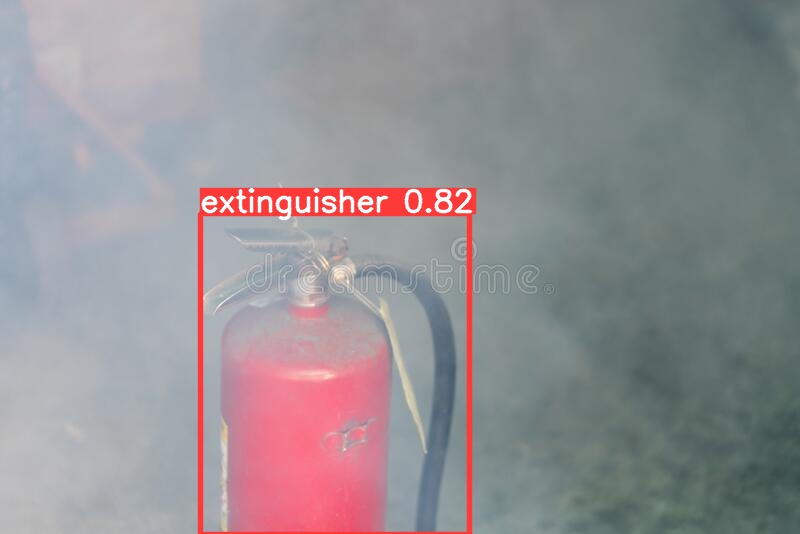

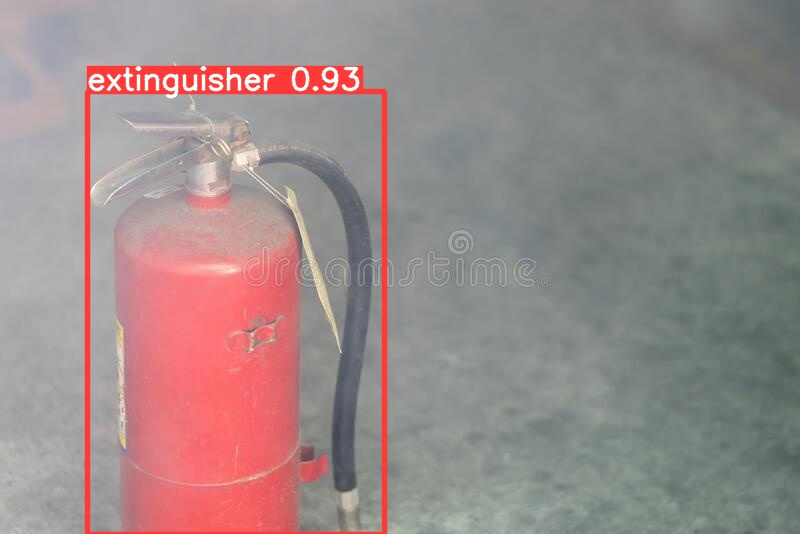

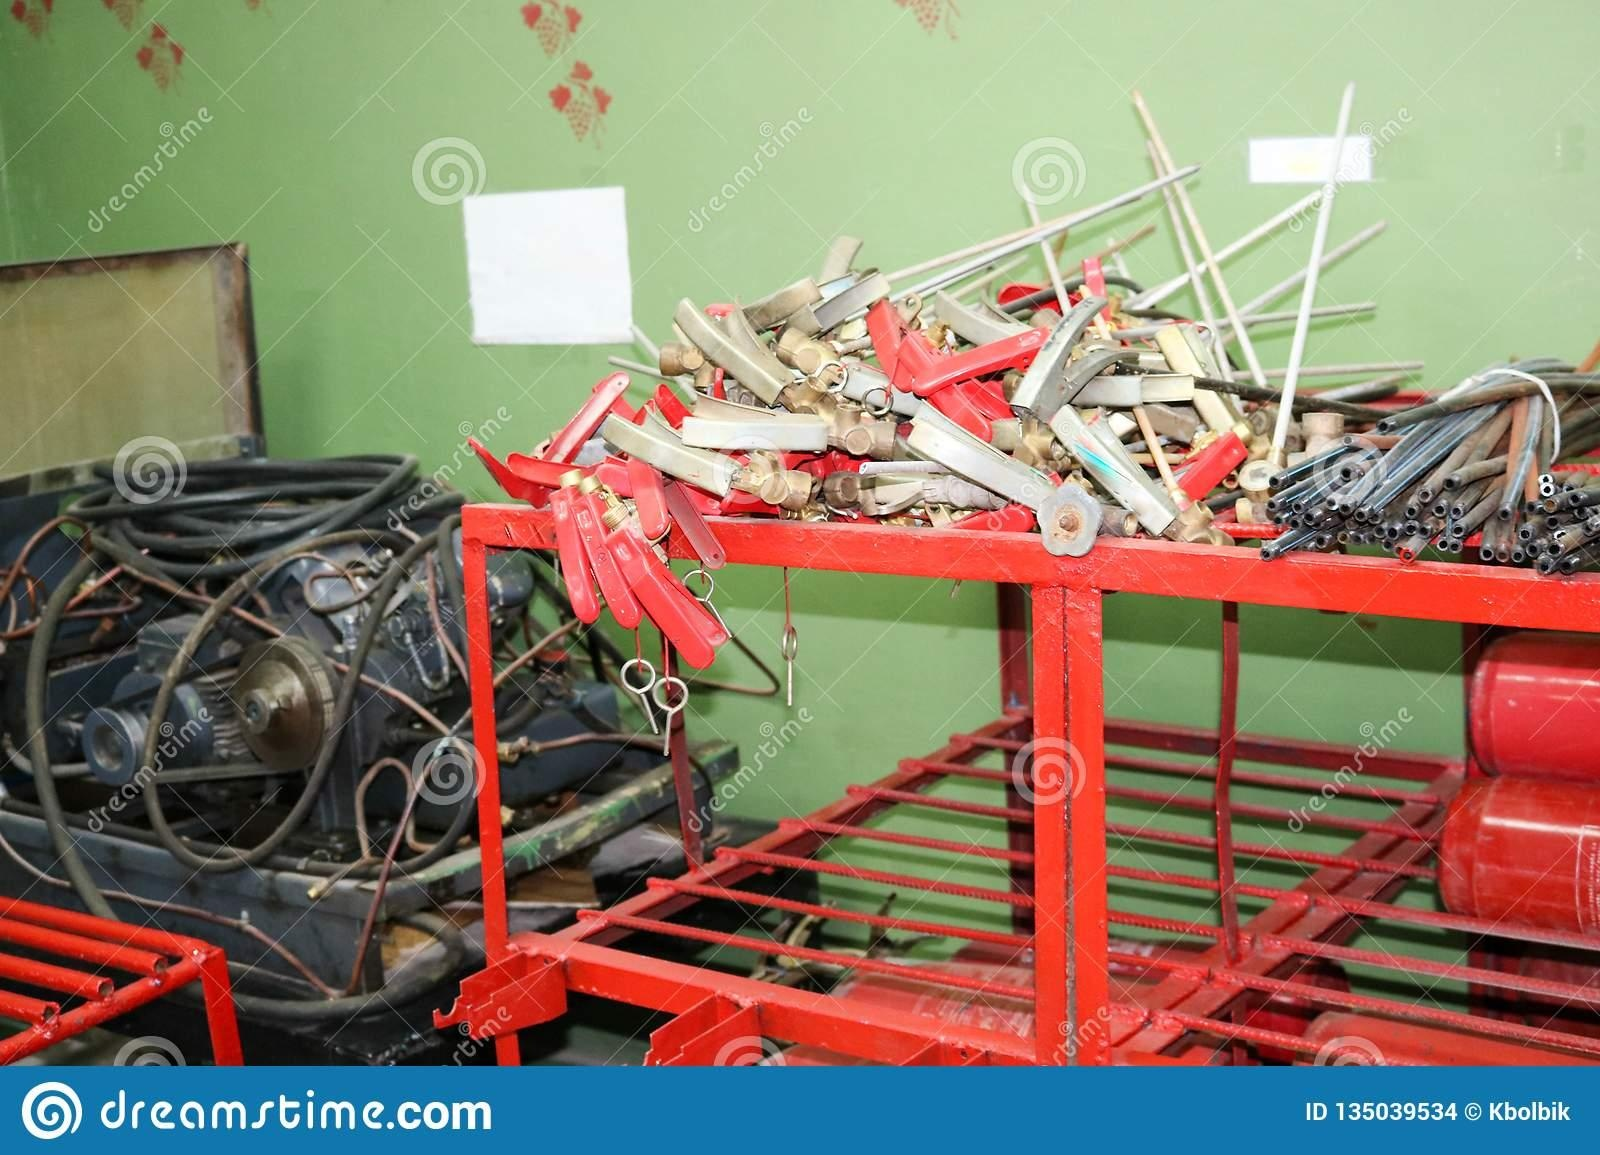

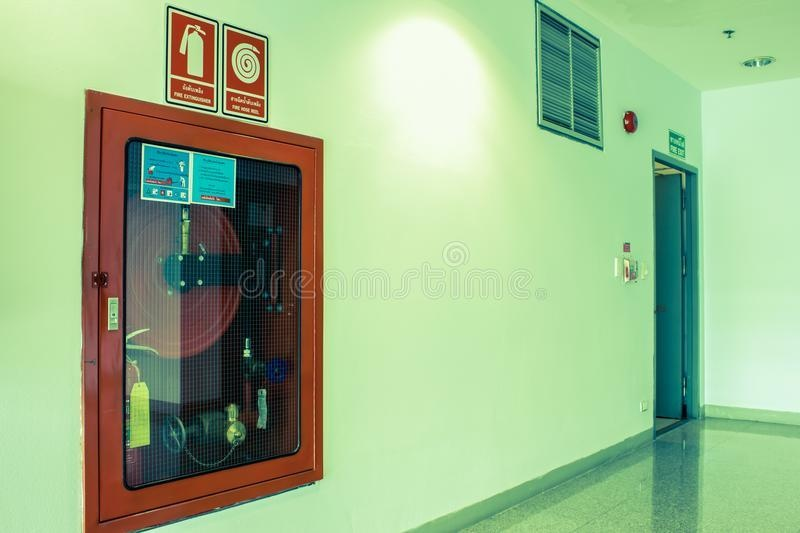

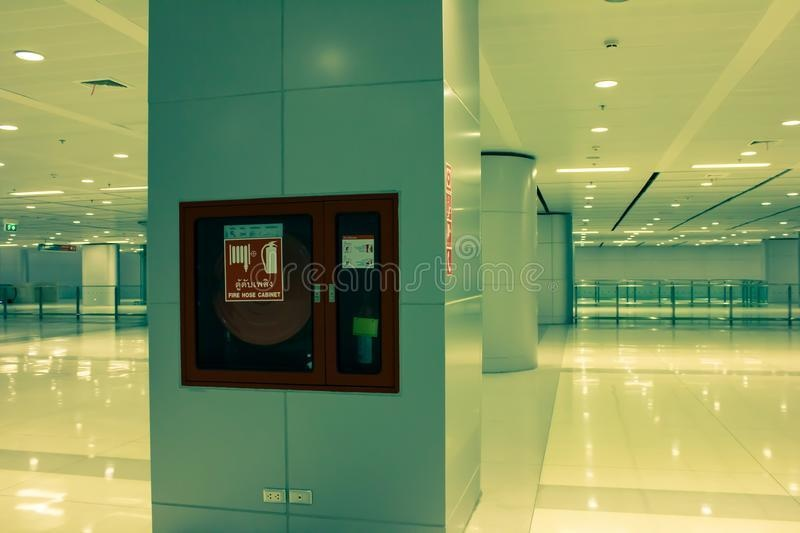

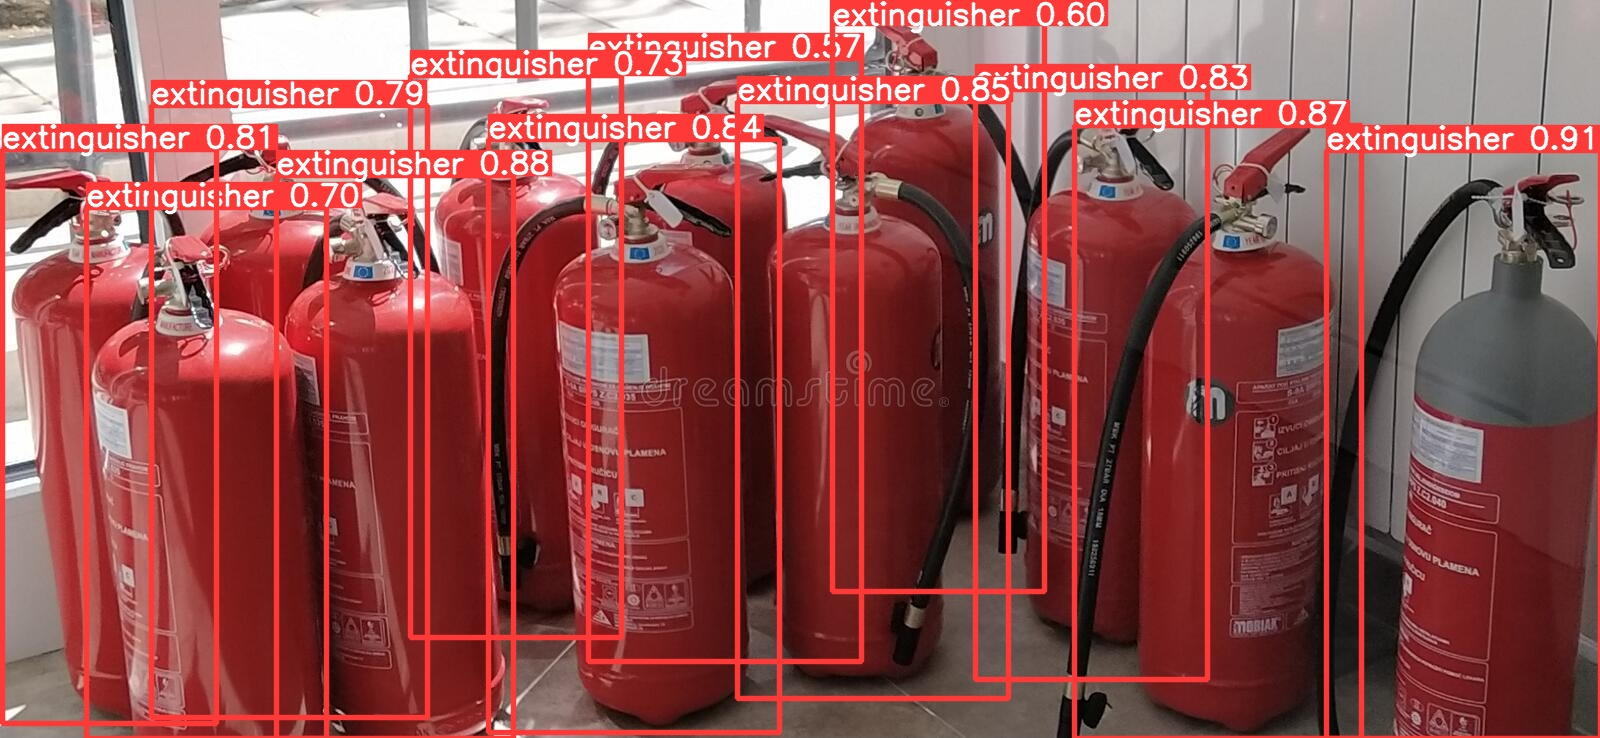

In [2]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display
i=0

for imageName in glob.glob('./runs/detect/exp4/*.jpg'): #assuming JPG
    if i < 10:
        display(Image(filename=imageName))
        print("\n")
        i += 1
    else:
        break